In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

## Coffs Currents

In [2]:
x = loadmat('/home/z3526974/Work/data/Shelf_moorings/CH100/CH100_CURR_all.mat')

In [3]:
#note: rotation angle in 18 degrees
VCUR_rot = x['VCURR_rot']
UCUR_rot = x['UCURR_rot']
time = x['time']
bin_depths = x['bin_depths']
depths = np.arange(94,-10,-4)
depths

array([94, 90, 86, 82, 78, 74, 70, 66, 62, 58, 54, 50, 46, 42, 38, 34, 30,
       26, 22, 18, 14, 10,  6,  2, -2, -6])

## Easiest to just pop the times into matlab to get the start, end and delta, and then build a new time axis from there.

In [4]:
time = pd.date_range(start='16/12/2009 09:35:00', end='16/10/2019 07:35:00',freq='5min')

#make an xarray dataset
ds = xr.Dataset(
        data_vars={'VCUR_rot':    (('depths', 'time'), VCUR_rot),
                   'UCUR_rot':    (('depths', 'time'), UCUR_rot)},
        coords={'depths': depths,
                'time': time})

ds

<xarray.Dataset>
Dimensions:   (depths: 26, time: 1034185)
Coordinates:
  * depths    (depths) int64 94 90 86 82 78 74 70 66 ... 22 18 14 10 6 2 -2 -6
  * time      (time) datetime64[ns] 2009-12-16T09:35:00 ... 2019-10-16T07:35:00
Data variables:
    VCUR_rot  (depths, time) float32 0.006888563 -0.0011803419 ... nan nan
    UCUR_rot  (depths, time) float32 0.07468967 0.055431098 ... nan nan

/home/z3526974/anaconda2/envs/py36/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/z3526974/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


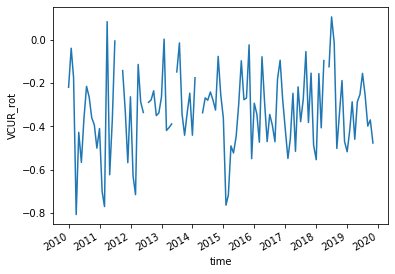

In [5]:
CH_monthly = ds.resample(time = '1M').mean()
CH_monthly.VCUR_rot.isel(depths=slice(2,90)).mean("depths").plot()

## BMP Currents

In [6]:
x = loadmat('/home/z3526974/Work/data/Shelf_moorings/BMP120/BMP120_CURR_all.mat')

In [7]:
VCUR_rot = x['VCURR_rot']
UCUR_rot = x['UCURR_rot']
time = x['time']
bin_depths = x['bin_depths']
depths = np.arange(-10,117,4)
depths

array([-10,  -6,  -2,   2,   6,  10,  14,  18,  22,  26,  30,  34,  38,
        42,  46,  50,  54,  58,  62,  66,  70,  74,  78,  82,  86,  90,
        94,  98, 102, 106, 110, 114])

In [8]:
time = pd.date_range(start='19/11/2014 09:25:00', end='14/11/2019 06:20:00',freq='5min')

#make an xarray dataset
ds = xr.Dataset(
        data_vars={'VCUR_rot':    (('depths', 'time'), VCUR_rot),
                   'UCUR_rot':    (('depths', 'time'), UCUR_rot)},
        coords={'depths': depths,
                'time': time})

ds

<xarray.Dataset>
Dimensions:   (depths: 32, time: 524412)
Coordinates:
  * depths    (depths) int64 -10 -6 -2 2 6 10 14 18 ... 90 94 98 102 106 110 114
  * time      (time) datetime64[ns] 2014-11-19T09:25:00 ... 2019-11-14T06:20:00
Data variables:
    VCUR_rot  (depths, time) float32 0.08003512 0.07107139 ... nan nan
    UCUR_rot  (depths, time) float32 0.058612123 0.060768887 ... nan nan

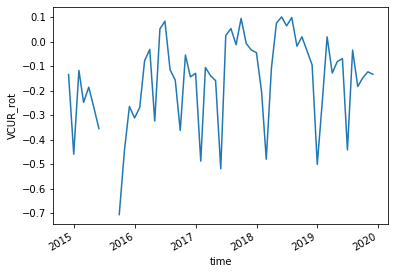

In [9]:
BMP_monthly = ds.resample(time = '1M').mean()
BMP_monthly.VCUR_rot.isel(depths=slice(2,114)).mean("depths").plot()